# Project 1 Exploratory data analysis

### DataSet :- ChurnModeling.csv

In [29]:
##importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
## initializing dataframe
churn = pd.read_csv("Churn_Modelling.csv")

### Description of the dataset and its attributes

#### The following dataset represents the features of customers of a bank and in this dataset our TARGET is the exited attribute

#### The attributes are:-
##### 1. CustomerID - This is the customer Id
##### 2. Surname - Name of the customer
##### 3. CreditScore -
##### 4.Geography - Locality
##### 5.Gender - Male or Female
##### 6.Age - Age of the customer
##### 7.Tenure  - number of active years
##### 8.Balance - Bank balance
##### 9.NumOfProducts 
##### 10.HasCC - Having credit card or not
##### 11.Activity 
##### 12.EstimatedSalary
##### 13.Exited - Target attribute


In [31]:
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Data Visualization

<BarContainer object of 3 artists>

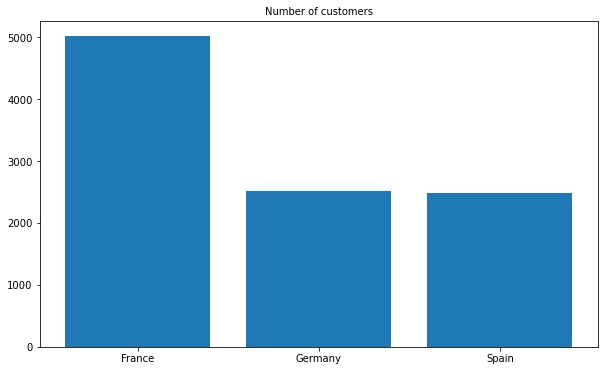

In [32]:
%matplotlib inline
## Histogram

plt.figure(figsize= (10,6))
plt.title("Number of customers",fontsize = 10)
plt.bar(x = churn['Geography'].value_counts().index,height =churn['Geography'].value_counts().values)

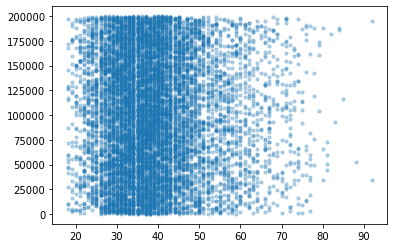

In [33]:
%matplotlib inline
## Scatter Plot

plt.scatter(y = churn.EstimatedSalary,x = churn.Age,s = 10,alpha = 0.3)

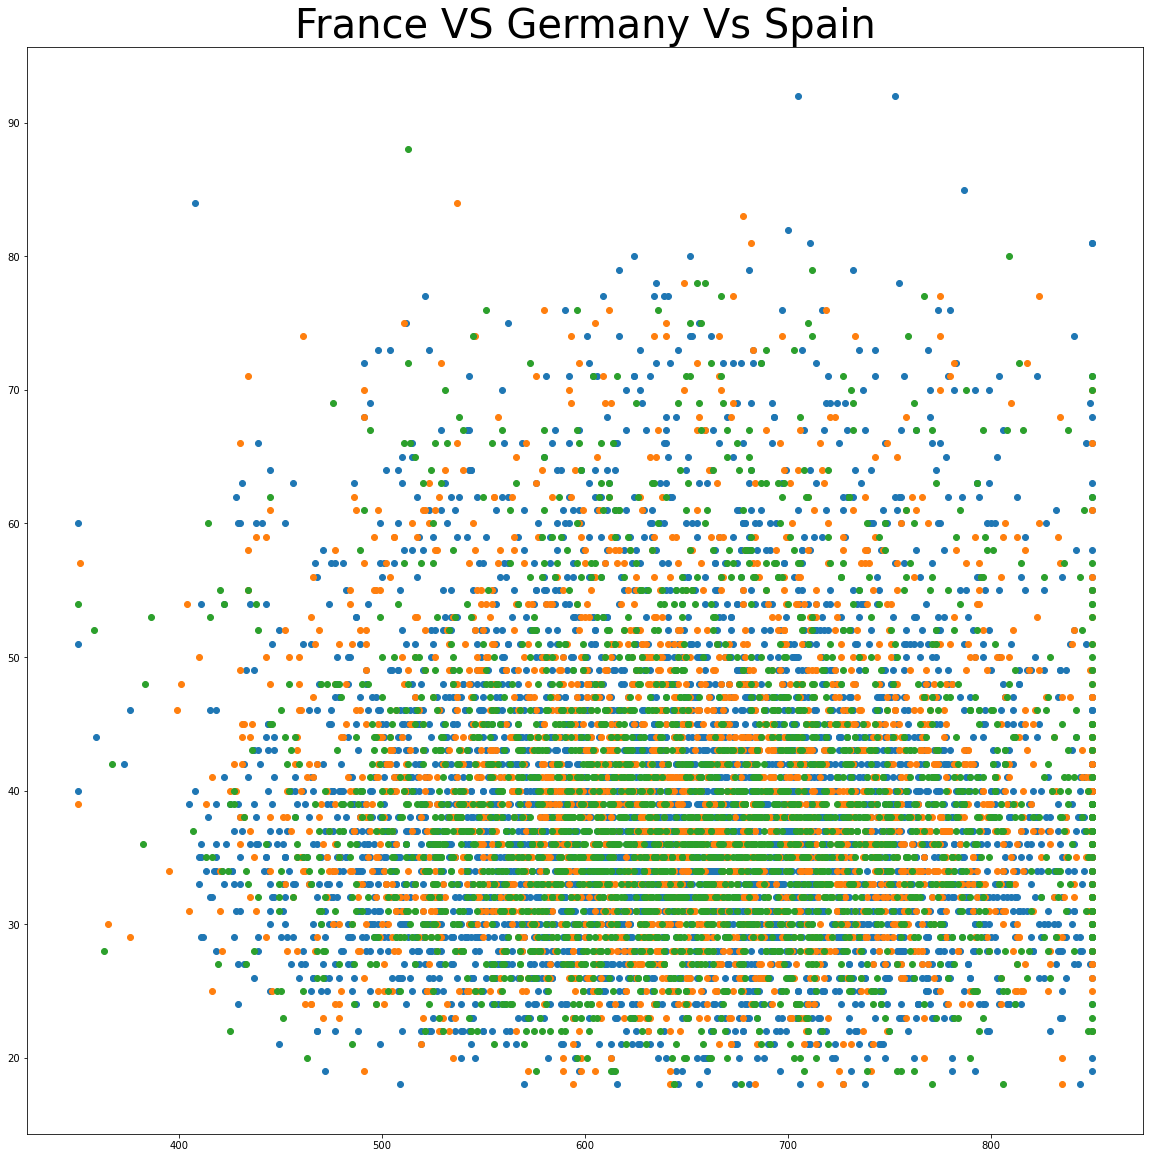

In [34]:
%matplotlib inline
##SubPLot
ax = plt.subplot()
plt.title("France VS Germany Vs Spain",fontsize = 40 )

ax.scatter(x = churn[churn.Geography == 'France']['CreditScore'],y = churn[churn.Geography == 'France']['Age'])
ax.scatter(x = churn[churn.Geography == 'Germany']['CreditScore'],y = churn[churn.Geography == 'Germany']['Age'])
ax.scatter(x = churn[churn.Geography == 'Spain']['CreditScore'],y = churn[churn.Geography == 'Spain']['Age'])

plt.gcf().set_size_inches((20, 20)) 

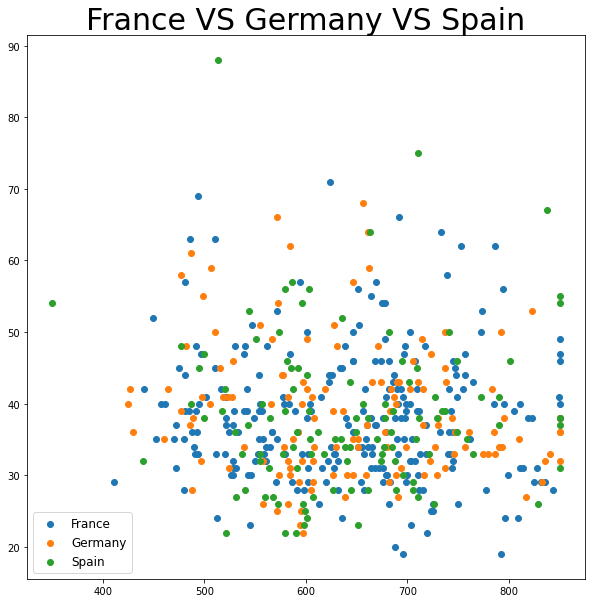

In [35]:
%matplotlib inline
## SubPlot with some sample data
sample = churn.sample(n=500, random_state=42) # Sample data

ax = plt.subplot()

plt.title("France VS Germany VS Spain", fontsize=30)

ax.scatter(x=sample[sample.Geography == 'France']['CreditScore'], y=sample[sample.Geography == 'France']['Age'])
ax.scatter(x=sample[sample.Geography == 'Germany']['CreditScore'], y=sample[sample.Geography == 'Germany']['Age'])
ax.scatter(x=sample[sample.Geography == 'Spain']['CreditScore'], y=sample[sample.Geography == 'Spain']['Age'])

plt.gcf().set_size_inches((10, 10)) 

ax.legend(labels=['France','Germany','Spain'], loc='lower left', fontsize=12)

In [36]:
## All the statistics of the customer hurn dataset
churn.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [37]:
temp = []
for i in churn.Balance:
    if i < 1:
        temp.append(i)
print(len(temp))

## This shows that there are 3617 entries whic is of 0 balance which migh be a problem so let us replace it with the mean

3617


In [38]:
churn['Balance'] = churn['Balance'].replace(['0.0'],'76485.889288')

In [39]:
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [40]:
## Checking for multiple entries with the help of chustomer ID
table = {}
for i in churn.CustomerId:
    if i in table:
        table[i] += 1
    else:
        table[i] = 1

#Here table is a hash table whit key as a customer ID and value as the no. of times it is repeated
#print(table) 

# check for multiple values in table
multiple = []
for k,v in table.items():
    if table[k] > 1:
        multiple.append(table[k])
print("The number of repeated values are -> ",len(multiple)) 
# since there are no repeated values we are good to go    

The number of repeated values are ->  0


# Null and Alternate Hypothesis

#### Let us say we predict that a customer who is an active member of the bank is less likely to exit. 
#### Then our Null hypothesis would be how likely it is for him to exit the bank ,This can be obtained by conducting a test
#### for a sample of 1000 entries in the dataset.After the sample test if we get that very few people are likely to exit
#### then our final null hypothesis would be a per is not likely to exit if he is not an active member
#### The alretnate hypothesis would be that a person might exit even if he is an active member and we can get the answer
#### increasing the sample size of the dataset

## Further Analysis

#### Once we complete the hypothesis testing we have to note that weather we accept or reject the null hypothesis and
#### also the reason behind our rejection.If we reject our hypothesis then we have to frame a new hypothesis for our data set and this #### would be leading us to more satisfying results